# K-Means

We want to set up five core energy centres in China


In [1]:
import re
import math
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
coordination_source = """
{name:'Lanzhou', geoCoord:[103.73, 36.03]},
{name:'Jiayuguan', geoCoord:[98.17, 39.47]},
{name:'Xining', geoCoord:[101.74, 36.56]},
{name:'Chengdu', geoCoord:[104.06, 30.67]},
{name:'Shijiazhuang', geoCoord:[114.48, 38.03]},
{name:'Laza', geoCoord:[102.73, 25.04]},
{name:'Guiyang', geoCoord:[106.71, 26.57]},
{name:'Wuhan', geoCoord:[114.31, 30.52]},
{name:'Zhengzhou', geoCoord:[113.65, 34.76]},
{name:'Jinan', geoCoord:[117, 36.65]},
{name:'Nanjing', geoCoord:[118.78, 32.04]},
{name:'Hefei', geoCoord:[117.27, 31.86]},
{name:'Hangzhou', geoCoord:[120.19, 30.26]},
{name:'Nanchang', geoCoord:[115.89, 28.68]},
{name:'Fuzhou', geoCoord:[119.3, 26.08]},
{name:'Guangzhou', geoCoord:[113.23, 23.16]},
{name:'Changsha', geoCoord:[113, 28.21]},
{name:'Haikou', geoCoord:[110.35, 20.02]},
{name:'Shenyang', geoCoord:[123.38, 41.8]},
{name:'Changchun', geoCoord:[125.35, 43.88]},
{name:'Haerbin', geoCoord:[126.63, 45.75]},
{name:'Taiyuan', geoCoord:[112.53, 37.87]},
{name:'Xian', geoCoord:[108.95, 34.27]},
{name:'Taiwan', geoCoord:[121.30, 25.03]},
{name:'Beijing', geoCoord:[116.46, 39.92]},
{name:'Shanghai', geoCoord:[121.48, 31.22]},
{name:'Chongqing', geoCoord:[106.54, 29.59]},
{name:'Tianjin', geoCoord:[117.2, 39.13]},
{name:'Huhehaote', geoCoord:[111.65, 40.82]},
{name:'Nanning', geoCoord:[108.33, 22.84]},
{name:'Tibet', geoCoord:[91.11, 29.97]},
{name:'Yinchuan', geoCoord:[106.27, 38.47]},
{name:'Wulumuqi', geoCoord:[87.68, 43.77]},
{name:'Hongkong', geoCoord:[114.17, 22.28]},
{name:'Mecao', geoCoord:[113.54, 22.19]}
"""

In [3]:
test_string = "{name:'Mecao', geoCoord:[113.54, 22.19]},"

In [4]:
pattern = re.compile('\d+.\d+') # d: decimal

In [5]:
pattern.findall(test_string)

['113.54', '22.19']

In [6]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [7]:
pattern.findall(test_string)

[('Mecao', '113.54', '22.19')]

In [8]:
city_location = {}

In [9]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info: continue
        
    city_name, longitude, latitude = city_info[0]
    
    longitude, latitude = float(longitude), float(latitude)
    
    city_location[city_name] = [longitude, latitude]

In [10]:
city_location

{'Lanzhou': [103.73, 36.03],
 'Jiayuguan': [98.17, 39.47],
 'Xining': [101.74, 36.56],
 'Chengdu': [104.06, 30.67],
 'Shijiazhuang': [114.48, 38.03],
 'Laza': [102.73, 25.04],
 'Guiyang': [106.71, 26.57],
 'Wuhan': [114.31, 30.52],
 'Zhengzhou': [113.65, 34.76],
 'Jinan': [117.0, 36.65],
 'Nanjing': [118.78, 32.04],
 'Hefei': [117.27, 31.86],
 'Hangzhou': [120.19, 30.26],
 'Nanchang': [115.89, 28.68],
 'Fuzhou': [119.3, 26.08],
 'Guangzhou': [113.23, 23.16],
 'Changsha': [113.0, 28.21],
 'Haikou': [110.35, 20.02],
 'Shenyang': [123.38, 41.8],
 'Changchun': [125.35, 43.88],
 'Haerbin': [126.63, 45.75],
 'Taiyuan': [112.53, 37.87],
 'Xian': [108.95, 34.27],
 'Taiwan': [121.3, 25.03],
 'Beijing': [116.46, 39.92],
 'Shanghai': [121.48, 31.22],
 'Chongqing': [106.54, 29.59],
 'Tianjin': [117.2, 39.13],
 'Huhehaote': [111.65, 40.82],
 'Nanning': [108.33, 22.84],
 'Tibet': [91.11, 29.97],
 'Yinchuan': [106.27, 38.47],
 'Wulumuqi': [87.68, 43.77],
 'Hongkong': [114.17, 22.28],
 'Mecao': [113.5

## Distance:

We need to consider the distances between cities.

1. Geo distance
2. cosine distance
3. Euclidean distance
4. Manhattan distance

In [11]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [12]:
geo_distance(city_location['Beijing'], city_location['Shanghai'])

1068.1567232158195

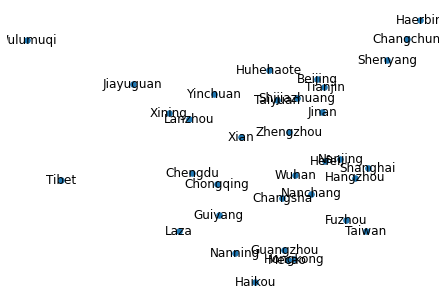

In [13]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_location.keys()))

nx.draw(city_graph, city_location, with_labels = True, node_size = 30)

## K-Means

Find the appropriate centres

In [14]:
Xs = np.array(list(city_location.values()))
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

In [15]:
all_x = Xs[:,0]
all_y = Xs[:,1]

In [16]:
def get_random_center(all_x, all_y):
    r_x = random.uniform(min(all_x), max(all_x))
    r_y = random.uniform(min(all_y), max(all_y))
    
    return r_x, r_y

In [17]:
get_random_center(all_x, all_y)

(92.24076480951537, 22.628357713748052)

In [18]:
K = 5

threshold = 3

centres = {'{}'.format(i+1): get_random_center(all_x, all_y) for i in range(K)}
the_first_choice = {k:v for k,v in centres.items()}

changed = True

while changed:
    closest_points = defaultdict(list)
    
    for x, y in zip(all_x, all_y):
        closest_c, closest_dis = min([(k, geo_distance((x,y), centres[k])) for k in centres], key = lambda z: z[1])
        closest_points[closest_c].append([x,y])
        
    changed = False
          
    for c in closest_points:
        formor_centre = centres[c]
    
        neigbors_belong_to_c = closest_points[c]
    
        neigbors_centre = np.mean(neigbors_belong_to_c, axis = 0)
    
        if geo_distance(neigbors_centre, formor_centre) > threshold:
            print('Updated: Centre {}'.format(c))
            centres[c] = neigbors_centre # update
            changed = True
        

Updated: Centre 4
Updated: Centre 5
Updated: Centre 1
Updated: Centre 3
Updated: Centre 2
Updated: Centre 4
Updated: Centre 1
Updated: Centre 5
Updated: Centre 3
Updated: Centre 2
Updated: Centre 4
Updated: Centre 2
Updated: Centre 5
Updated: Centre 3
Updated: Centre 4
Updated: Centre 1
Updated: Centre 2
Updated: Centre 5
Updated: Centre 3


In [19]:
centres

{'1': array([101.11  ,  28.8175]),
 '2': array([118.29777778,  40.42777778]),
 '3': array([117.517,  29.866]),
 '4': array([101.09 ,  38.095]),
 '5': array([111.055     ,  22.84333333])}

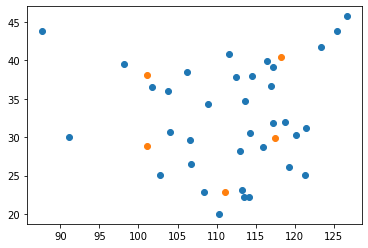

In [20]:
plt.scatter(all_x, all_y)
plt.scatter([x for x,y in centres.values()], [y for x,y in centres.values()])
# plt.scater(*zip(*centres.values()))


In [21]:
city_location_with_station = {
    'Energy Centre-{}'.format(int(i)): position for i, position in centres.items()
    
}

In [22]:
city_location_with_station

{'Energy Centre-1': array([101.11  ,  28.8175]),
 'Energy Centre-2': array([118.29777778,  40.42777778]),
 'Energy Centre-3': array([117.517,  29.866]),
 'Energy Centre-4': array([101.09 ,  38.095]),
 'Energy Centre-5': array([111.055     ,  22.84333333])}

In [23]:
def draw_cities(cities, color = None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph, cities, node_color = color, with_labels = True, node_size = 30)

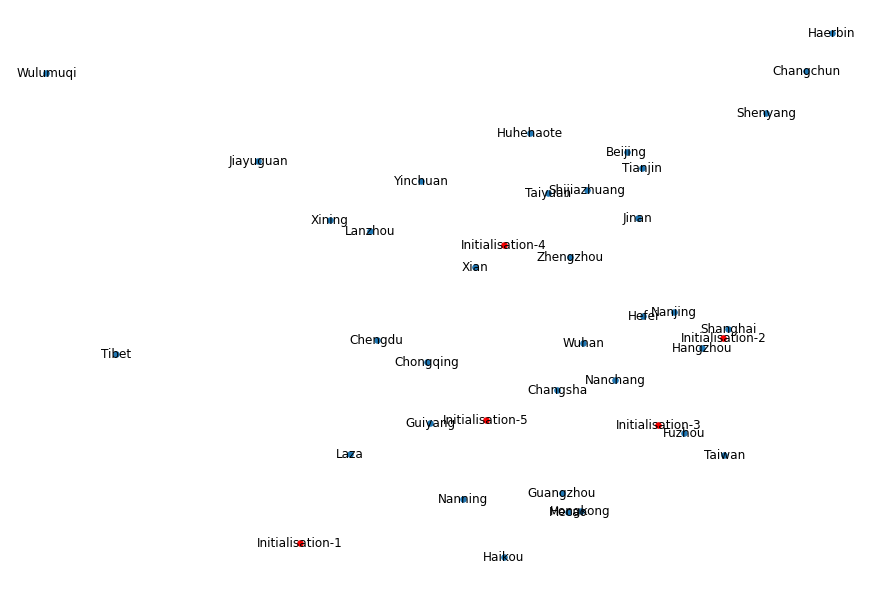

In [24]:
plt.figure(1,figsize=(12,8)) 
draw_cities({'Initialisation-{}'.format(int(i)): p for i,p in the_first_choice.items()}, color = 'red')
draw_cities(city_location)

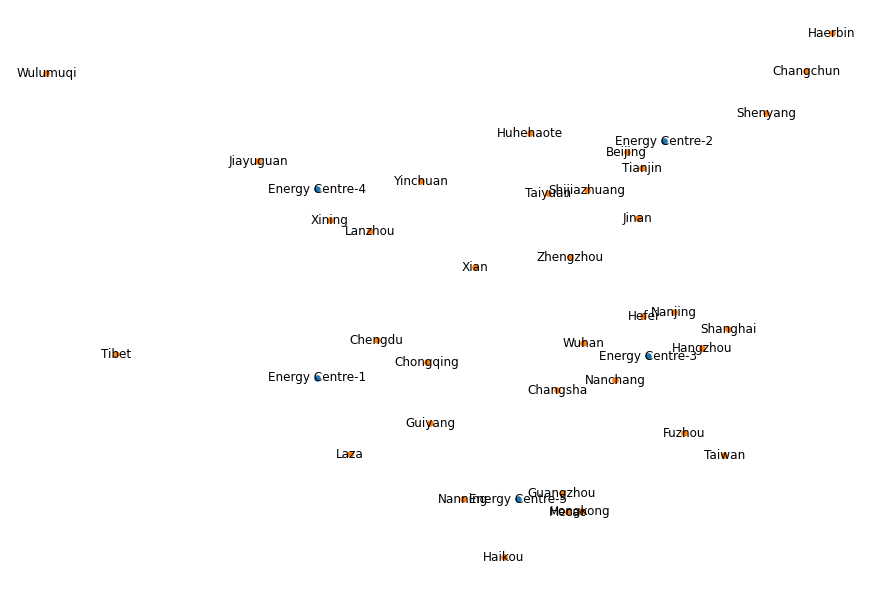

In [25]:
plt.figure(1,figsize=(12,8)) 
draw_cities(city_location_with_station)
draw_cities(city_location)